# Data Preprocessing:

In [64]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as stats
import math
import random
from random import sample

In [65]:
# read the data

data = pd.read_csv('fifa.csv')
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [66]:
# clean tha data

def clean_value(x):
    
    if isinstance(x,str):
        a=x.replace('€','')
        
        if 'M' in a:
            a=float(a.replace('M', ''))*1000000
        elif 'K' in a:
            a=float(a.replace('K', ''))*1000
        return float(a)
       
data['Value'] = data['Value'].apply(clean_value)
data['Wage'] = data['Wage'].apply(clean_value)

In [67]:
def clean_date(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[-1]
    return(x)

data['Joined']=data['Joined'].replace(np.nan,0)
data['Joined'] = data['Joined'].apply(clean_date).astype('int')

In [68]:
import datetime
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])
data['year'] = pd.DatetimeIndex(data['Contract Valid Until']).year.astype(str)

In [69]:
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


data['Height'] = data['Height'].apply(clean_height)

In [70]:
def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

data['Weight'] = data['Weight'].apply(clean_weight).astype('float')

In [71]:
data['Release Clause'] = data['Release Clause'].apply(clean_value)
data['Release Clause']=data['Release Clause'].replace(np.nan,data['Release Clause'].mean())

In [72]:
# 2. Drop any columns that you deem unecessary for analysis

data=data[['ID', 'Name','Overall','Potential','Value', 'Wage','Age','International Reputation','Skill Moves','Position','Joined','Contract Valid Until', 'Height', 'Weight','Release Clause', 'year']]
data

,ID,Name,Overall,Potential,Value,Wage,Age,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,year
0,158023,L. Messi,94,94,110500000.0,565000.0,31,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500000.0,2021.0
1,20801,Cristiano Ronaldo,94,94,77000000.0,405000.0,33,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100000.0,2022.0
2,190871,Neymar Jr,92,93,118500000.0,290000.0,26,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100000.0,2022.0
3,193080,De Gea,91,93,72000000.0,260000.0,27,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600000.0,2020.0
4,192985,K. De Bruyne,91,92,102000000.0,355000.0,27,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400000.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,47,65,60000.0,1000.0,19,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143000.0,2019.0
18203,243165,N. Christoffersson,47,63,60000.0,1000.0,19,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113000.0,2020.0
18204,241638,B. Worman,47,67,60000.0,1000.0,16,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165000.0,2021.0
18205,246268,D. Walker-Rice,47,66,60000.0,1000.0,17,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143000.0,2019.0


In [73]:
# Filling the missing values

data['Weight'].fillna((data['Weight'].mean()), inplace = True) 
data['Height'].fillna((data['Height'].mean()), inplace = True) 
data['International Reputation'].fillna(data['International Reputation'].mean(), inplace = True) 
data['Skill Moves'].fillna(data['Skill Moves'].mean(), inplace = True)  
data['Position'].fillna('Not available', inplace = True) 
data['Joined'].fillna('Not available', inplace = True) 
data['Contract Valid Until'].fillna('Not available', inplace = True) 
data['year'].fillna('Not available', inplace = True) 
data['Release Clause'].fillna(data['Release Clause'].mean(), inplace = True) 
data['Value'].fillna((data['Value'].mean()), inplace = True) 
data['Wage'].fillna((data['Wage'].mean()), inplace = True) 

# Exploratory Analysis

1. Plot the distribution of Overall rating for all players

<AxesSubplot:ylabel='Density'>

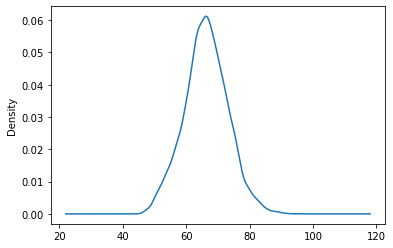

In [74]:
data['Overall'].plot(kind='kde')

In [75]:
data['Overall'].skew()

0.06718492227833812

2. Generate pair plots for the following variables: 
    
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

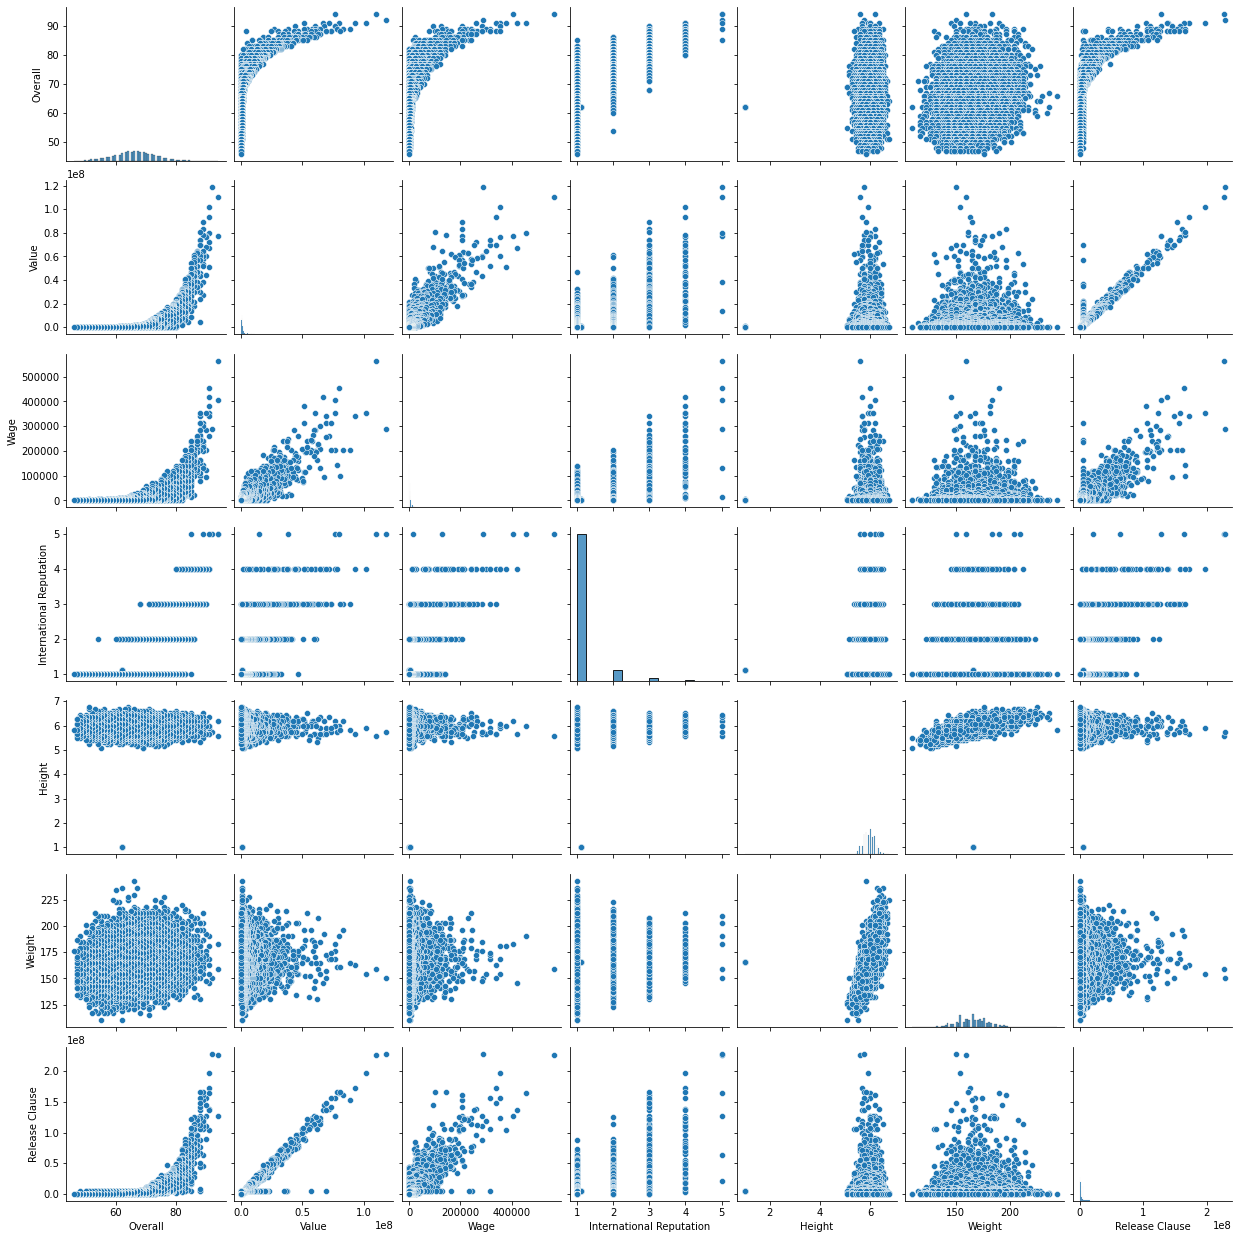

In [76]:
sns.pairplot(data[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [52]:
data1=data[data['year']=='2020.0'].sort_values(by='Overall',ascending=False).head(20)
data1[['ID', 'Name','Overall','Potential','Value', 'Wage','Age','International Reputation','Skill Moves','Position','Height', 'Weight','Release Clause']]

,ID,Name,Overall,Potential,Value,Wage,Age,International Reputation,Skill Moves,Position,Height,Weight,Release Clause
3,193080,De Gea,91,93,72000000.0,260000.0,27,4.0,1.0,GK,6.333333,168.0,NaN
6,177003,L. Modrić,91,91,67000000.0,420000.0,32,4.0,4.0,RCM,5.666667,146.0,NaN
8,155862,Sergio Ramos,91,91,51000000.0,380000.0,32,4.0,3.0,RCB,6.000000,181.0,NaN
5,183277,E. Hazard,91,91,93000000.0,340000.0,27,4.0,4.0,LF,5.666667,163.0,NaN
13,168542,David Silva,90,90,60000000.0,285000.0,32,4.0,4.0,LCM,5.666667,148.0,NaN
21,179813,E. Cavani,89,89,60000000.0,200000.0,31,4.0,3.0,LS,6.083333,170.0,NaN
24,138956,G. Chiellini,89,89,27000000.0,215000.0,33,4.0,2.0,LCB,6.166667,187.0,NaN
31,190460,C. Eriksen,88,91,73500000.0,205000.0,26,3.0,4.0,CAM,5.916667,168.0,NaN
39,164240,Thiago Silva,88,88,24000000.0,165000.0,33,4.0,2.0,RCB,6.000000,181.0,NaN
50,175943,D. Mertens,87,87,45000000.0,135000.0,31,3.0,4.0,RF,5.583333,134.0,NaN


a)	What would the average wage for this set of players be?

In [77]:
print("The average wage of top 20 players by overall rating is",data1['Wage'].mean())

The average wage of top 20 players by overall rating is 205450.0


b) What is the average age?

In [78]:
print("The average age of top 20 players by overall rating is",data1['Age'].mean())

The average age of top 20 players by overall rating is 30.65


c) Is there a correlation between the Overall rating and Value for these players?

In [79]:
data3=data[['Overall','Value']]
cor=data3.corr()
print('Yes it is',cor.iloc[0,1])

Yes it is 0.6270852347261993


4.	Generate tables containing the top 5 players by Overall rating for each unique position

In [80]:
data4=data[['Name','Position','Overall']]
data5=pd.pivot_table(data4,index=['Position','Name'])
data5

Overall
Position Name                 
CAM      A. Adouyev       62.0
         A. Ajagun        69.0
         A. Aktas         54.0
         A. Al Fraidi     67.0
         A. Al Nazera     62.0
...                        ...
ST       Zé Turbo         67.0
         Álex López       66.0
         Álvaro           70.0
         Ángel            79.0
         Éder             75.0

[18097 rows x 1 columns]

In [81]:
d1=data.groupby(['Position']).mean().T
l1=d1.columns

In [82]:
a=data5.loc[l1[0]].sort_values('Overall',ascending=False).head(5)
for i in range(1,len(l1)):
    b=data5.loc[l1[i]].sort_values('Overall',ascending=False).head(5)
    a=pd.concat([a,b])

In [83]:
c=pd.merge(a,data[['ID','Name','Position','Overall','Wage']],on=['Name','Overall'],how='left')

In [84]:
final_c=c.groupby(['Position','Name']).mean()

a)	Are there any players appearing in more than one Table. Please point out such players ?

In [85]:
for i in range(0,len(l1)):
    print("For",l1[i])
    print(final_c.loc[l1[i]])
    print()

For CAM
                 Overall      ID      Wage
Name                                      
A. Griezmann        89.0  194765  145000.0
C. Eriksen          88.0  190460  205000.0
M. Özil             86.0  176635  190000.0
Roberto Firmino     86.0  201942  195000.0
T. Müller           86.0  189596  135000.0

For CB
             Overall      ID      Wage
Name                                  
D. Godín        90.0  182493  125000.0
M. Benatia      86.0  177509  160000.0
N. Otamendi     85.0  192366  170000.0
S. Umtiti       87.0  205600  205000.0
V. Kompany      85.0  139720  170000.0

For CDM
                 Overall      ID      Wage
Name                                      
Casemiro            88.0  200145  285000.0
Fabinho             84.0  209499  120000.0
Fernandinho         86.0  135507  185000.0
M. Pjanić           86.0  180206  180000.0
Sergio Busquets     89.0  189511  315000.0

For CF
              Overall      ID     Wage
Name                                  
A. Milik      

b) What is the average wage one can expect to pay for the top 5 in every position?

In [86]:
wage=final_c.groupby(['Position']).mean()
print('Average wage to be paid to top 5 players by position is as follows:')
wage.loc[:,('Wage')]
#wage.drop('Overall',axis=1,inplace=True)

Average wage to be paid to top 5 players by position is as follows:


Position
CAM              174000.0
CB               166000.0
CDM              217000.0
CF                47400.0
CM               130600.0
GK               192800.0
LAM               81600.0
LB               177200.0
LCB              162000.0
LCM              184400.0
LDM              138000.0
LF               123200.0
LM               152600.0
LS               130200.0
LW               261000.0
LWB               33000.0
Not available         0.0
RAM               46600.0
RB               155400.0
RCB              219000.0
RCM              238600.0
RDM              105000.0
RF               148000.0
RM               126400.0
RS               130400.0
RW               202000.0
RWB               44200.0
ST               294000.0
Name: Wage, dtype: float64